## Data Cleaning

In [29]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
from sklearn import preprocessing

### Movie Budgets

In [2]:
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
print(movie_budgets.shape)
movie_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
len(movie_budgets.movie.unique())

5698

In [50]:
movie_budgets[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']].duplicated().sum()

0

In [3]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Here we can see that our values for production budget, domestic gross, and worldwide gross are being read as objects rather than numbers, and our release date isn't being represented as a date time object

In [4]:
movie_budgets['production_budget'] = (movie_budgets['production_budget']
                                      .str.replace(',', '')
                                      .str.replace('$', '')
                                      .astype(float))

movie_budgets['domestic_gross'] = (movie_budgets['domestic_gross']
                                   .str.replace(',', '')
                                   .str.replace('$', '')
                                   .astype(float))

movie_budgets['worldwide_gross'] = (movie_budgets['worldwide_gross']
                                    .str.replace(',', '')
                                    .str.replace('$', '')
                                    .astype(float))

In [5]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [10]:
movie_budgets['budget_to_domestic_gross'] = movie_budgets.domestic_gross / movie_budgets.production_budget
movie_budgets['budget_to_international_gross'] = movie_budgets.worldwide_gross / movie_budgets.production_budget

Here we have created two ratios to examine the production budgets against domestic gross revenue and international gross revenue

In [27]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,budget_to_domestic_gross,budget_to_international_gross,normalized_domestic_ratio
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2.983540,4.800161,0.779054
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,26.086591,29.530282,0.761290
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.205633,0.492296,0.187005
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,0.878326,1.708310,0.630381
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2.058148,3.758346,1.117810
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,1800.000000,1800.000000,7.496097


<AxesSubplot:>

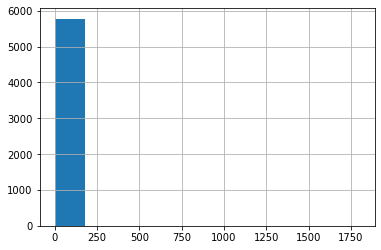

In [21]:
movie_budgets.budget_to_domestic_gross.hist()

In [40]:
movie_budgets['normalized_domestic_ratio'] = np.log(movie_budgets['budget_to_domestic_gross'] + 1)

<AxesSubplot:>

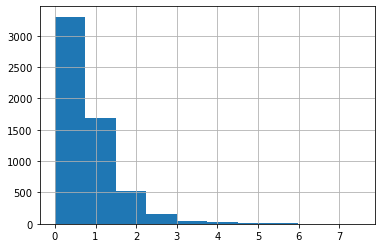

In [41]:
movie_budgets.normalized_domestic_ratio.hist()

## Data Understanding

In [85]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


<AxesSubplot:ylabel='Frequency'>

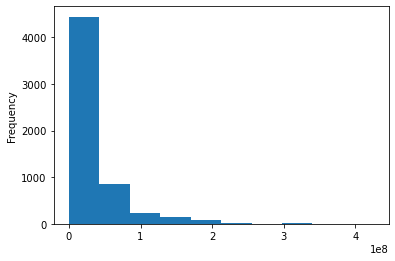

In [90]:
movie_budgets.production_budget.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

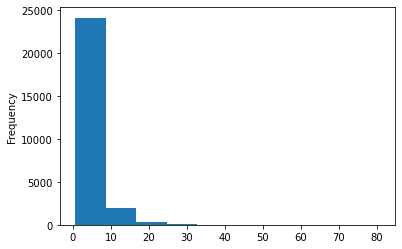

In [93]:
the_movieDB.popularity.plot(kind='hist')

In [ ]:
# generate box and whisker plots to make case for normalization or remove outliers